1. [Creating Data](#1)
1. [Classifications, KNN SVM,DT, RF, ADA ,V1](#2)
1. [Getting and visualisation of results](#3)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
#warning library
import warnings
warnings.filterwarnings ('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id = "1"></a><br>
# Creating Data

<AxesSubplot: xlabel='0', ylabel='1'>

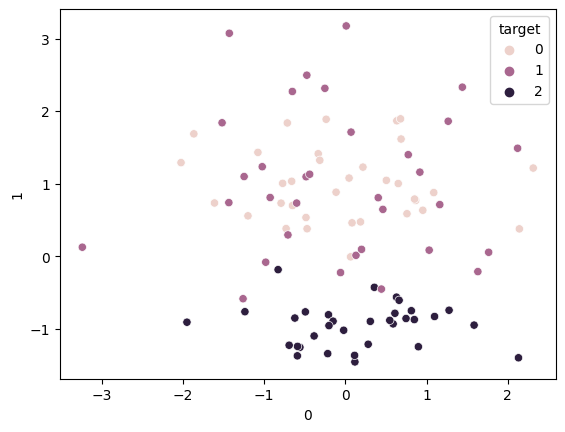

In [2]:

random_state = 42
n_samples = 100
n_features = 3
n_classes = 3
noise_class = 0.0
x,y =make_classification (n_samples = n_samples, n_features = n_features, n_classes = n_classes, n_repeated = 0,
                            n_redundant = 0,n_informative = n_features-1, 
                            random_state= random_state, n_clusters_per_class = 1,flip_y = noise_class)
data = pd.DataFrame(x) 
data["target"] = y
plt.figure() 
sns.scatterplot(x = data.iloc[:,0], y = data.iloc[:,1], hue = "target", data = data )

In [3]:
noise_moon = 0.8
noise_circle=0.0 
noise_class = 0.2

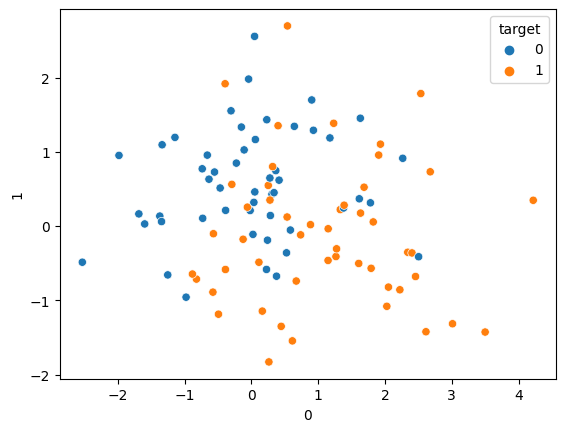

In [4]:
data_classification = (x, y)
moon = make_moons(n_samples=n_samples, noise=noise_moon, random_state=random_state)
data = pd.DataFrame(moon[0])
data["target"] = moon[1]
plt.figure()
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue="target", data=data)
circle = make_circles(n_samples=n_samples, factor=0.5, noise=noise_moon, random_state=random_state)


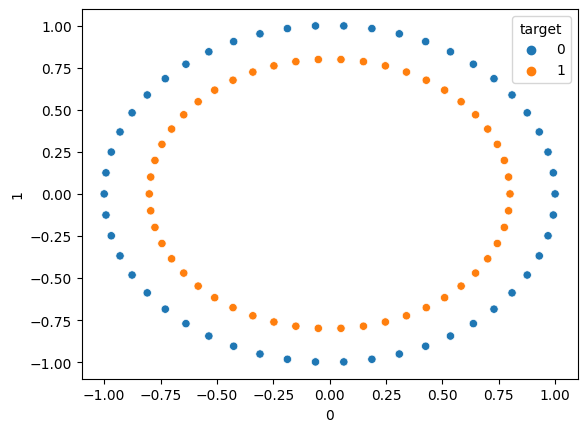

In [5]:
circle = make_circles(n_samples=n_samples, noise=noise_circle, random_state=random_state)
data = pd.DataFrame(circle[0])
data["target"] = circle[1]
plt.figure()
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue="target", data=data)
circle = make_circles(n_samples=n_samples, factor=0.5, noise=noise_circle, random_state=random_state)


<a id = "2"></a><br>
# Classifications, KNN SVM,DT, RF, ADA ,V1

In [6]:
datasets = [moon,circle]

In [7]:
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=15)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=500, random_state=42)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=500, random_state=42)
v1 = VotingClassifier(estimators = [('svc',svc),('knn',knn),('dt',dt),('rf',rf),('ada',ada)])

names = ["SVC", "KNN", "Decision Tree", "Random Forest", "Ada Boost","v1"]
classifiers = [svc, knn, dt, rf, ada,v1]


Dataset # 0
Dataset # 1


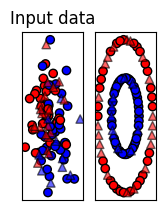

In [8]:
h = .2
i = 1
for ds_cnt, ds in enumerate(datasets):
# preprocess dataset, split into training and test part 
    x,y = ds
    x = RobustScaler().fit_transform(x)
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=.3, random_state=42)
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5 
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5 
    xx, yy = np.meshgrid (np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000','#0000FF'])
    ax = plt.subplot(len(datasets), len (classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter (x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter (x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,marker = '^', edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    print("Dataset # {}".format(ds_cnt))

<a id = "3"></a><br>
# Getting and visualisation of results

SVC test set score: 1.0
SVC: train set score: 1.0

KNN test set score: 0.3333333333333333
KNN: train set score: 0.6142857142857143

Decision Tree test set score: 1.0
Decision Tree: train set score: 1.0

Random Forest test set score: 1.0
Random Forest: train set score: 1.0

Ada Boost test set score: 1.0
Ada Boost: train set score: 1.0

v1 test set score: 1.0
v1: train set score: 1.0

--------------


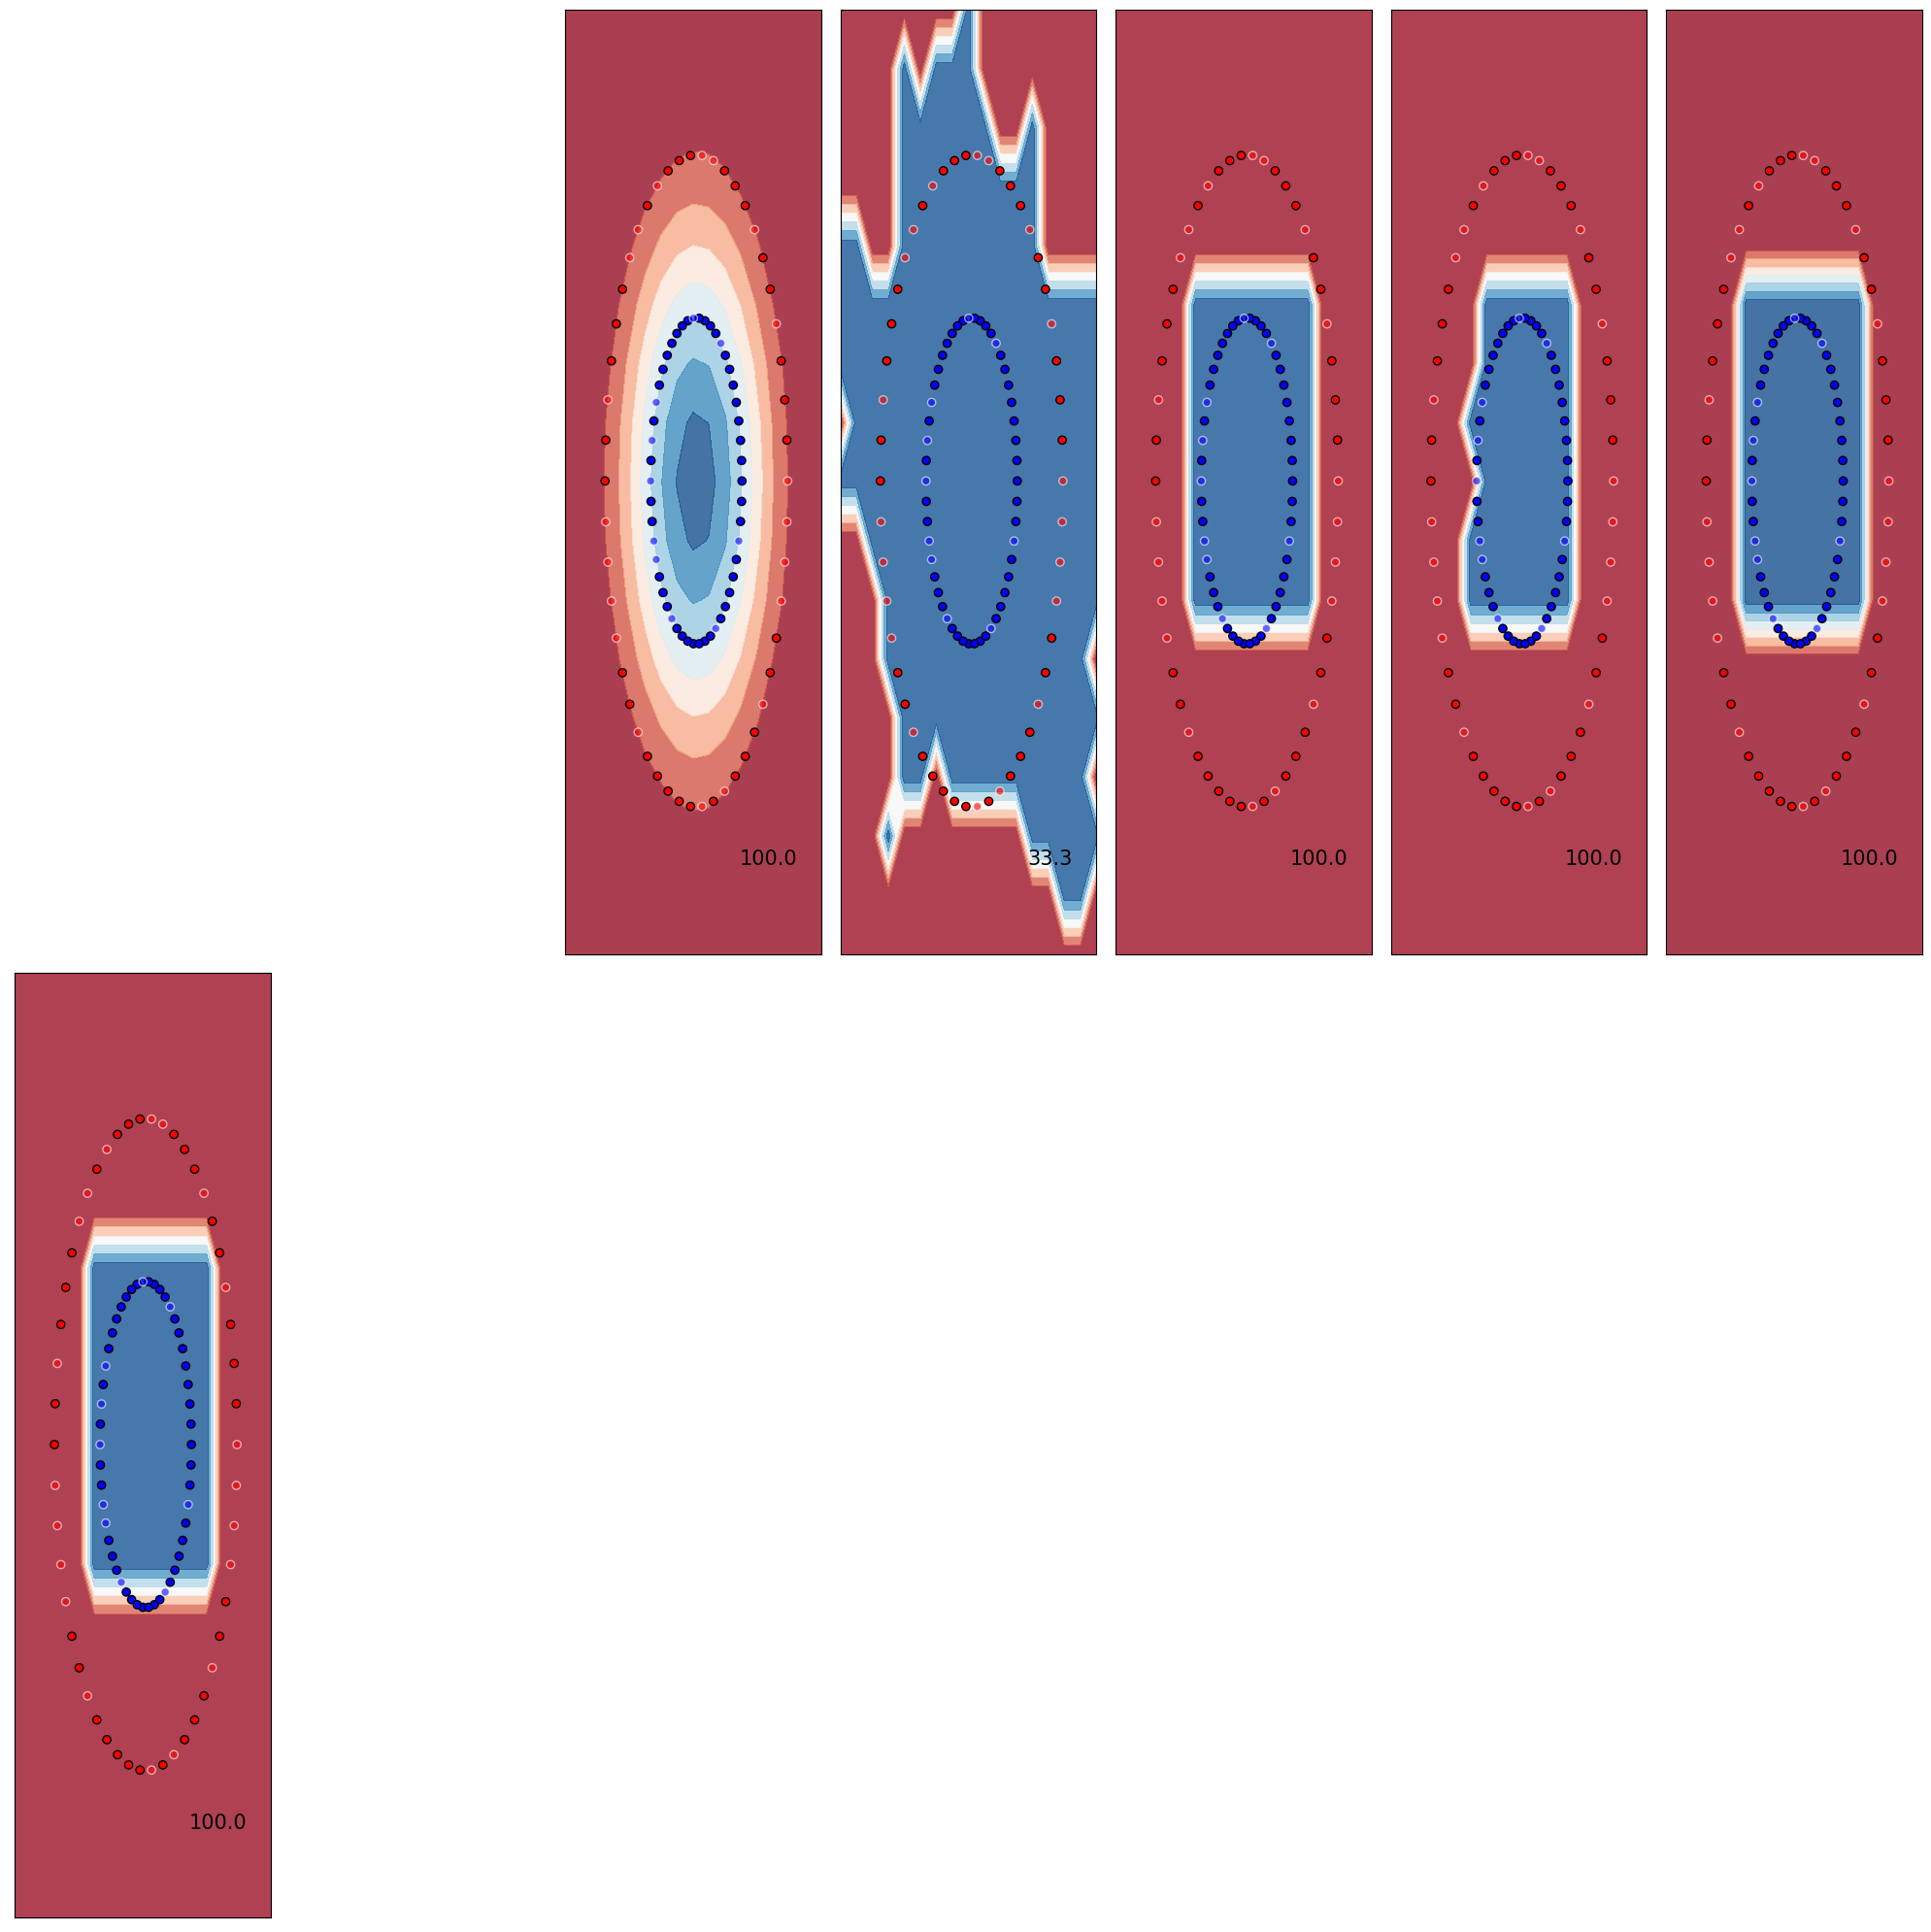

In [9]:
plt.figure(figsize=(20, 20))
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    print("{} test set score: {}".format(name, score))
    
    score_train = clf.score(x_train, y_train)
    print("{}: train set score: {}".format(name, score_train)) 
    print()
    
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    # Plot the training points
    ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cm_bright, marker='o', edgecolors='white', alpha=0.6)
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    score = score * 100
    ax.text(xx.max() - .3, yy.min() + .3, ('%.1f' % score), size=15, horizontalalignment='right')
    i += 1
print("--------------")
plt.tight_layout()
plt.show()


In [10]:
def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=42)
    for name, clf in zip(names, classifiers):
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        print("{} test set score: {}".format(name, score))
        score_train = clf.score(x_train, y_train)
        print("{}: train set score: {}".format(name, score_train)) 
        print()

print("Dataset #2")
make_classify(data_classification, classifiers, names)


Dataset #2
SVC test set score: 0.9
SVC: train set score: 0.9833333333333333

KNN test set score: 0.875
KNN: train set score: 0.9166666666666666

Decision Tree test set score: 0.925
Decision Tree: train set score: 1.0

Random Forest test set score: 0.925
Random Forest: train set score: 1.0

Ada Boost test set score: 0.925
Ada Boost: train set score: 1.0

v1 test set score: 0.925
v1: train set score: 1.0

